# Lecture 04: Stochastic Gradient Descent (SGD)

## Stochastic Gradient Descent
### The main idea:
*   The main limitation of gradient descent (GD) is that sum of **all** of the gradients needs to be calculated before we update the weights.
*   Stochastic gradient descent (SGD).
*   Decreases the number of **computations per update**.
*   At the cost of increasing **number of updates** necessary for convergence.
*   To decrease **computations per update**, SGD calculates a noisy estimation of the gradient by using randomly selected subset of the observations.
*   The hope that the more frequent updates of the weights will result in faster convergence

### Let's have it coded

In [2]:
from random import Random
from math import sqrt
SEED = 5
def generate_pnts(N=1000):
    random_obj = Random(x=SEED)
    return[random_obj.uniform(a=0,b=1) for _ in range (N)],[random_obj.uniform(a=0,b=1)for _ in range (N)]
def loss(x_p, y_p, batch_x, batch_y):
    return ((1/len(batch_x)) * sum([sqrt((x_i - x_p)**2+(y_i-y_p)**2) for x_i, y_i in zip(batch_x, batch_y)]))
def calc_grad_closed_form( batch_x, batch_y,x_p, y_p):
    sum_x, sum_y = 0,0
    for x_i, y_i in zip(batch_x,batch_y):
        inv_sqrt = ((x_i - x_p)**2+(y_i - y_p)**2)**(-0.5)
        sum_x += inv_sqrt * (-x_p + x_i)
        sum_y += inv_sqrt * (y_i - y_p)
    return -sum_x/len(batch_x), -sum_y/len(batch_y)

list_x, list_y = generate_pnts()
EPOCHS = 100 # number of times to visit the whole dataset
BATCH_SZ = 4 # number of points contributing to gradient estimate


In [3]:
from math import ceil

N = len(list_x) #the total number of points 
NUM_BATCHES = ceil(N / BATCH_SZ) #250
x_p_sgd, y_p_sgd = 0.3,0.3
x_p_gd, y_p_gd = 0.3,0.3
DELTA = 0.01
losses_sgd, losses_gd =[],[]
indices = [i for i in range(len(list_x))]
dummy_rand_gen = Random(x=SEED)

for _ in range(EPOCHS): #100
    dummy_rand_gen.shuffle(indices)
    #SGD
    for batch_ind in range(NUM_BATCHES): #250 -> N / Num_BATCHES
        batch_indices = indices[batch_ind*BATCH_SZ : (batch_ind+1)*BATCH_SZ]
        result_batch_x = [list_x[i] for i in batch_indices]
        result_batch_y = [list_y[j] for j in batch_indices]
        grad_x_sgd, grad_y_sgd = calc_grad_closed_form(result_batch_x, result_batch_y, x_p_sgd, y_p_sgd)
        x_p_sgd -= DELTA * grad_x_sgd
        y_p_sgd -= DELTA * grad_y_sgd
        losses_sgd.append(loss(x_p_sgd, y_p_sgd, list_x, list_y))
    #GD
    grad_x_gd, grad_y_gd = calc_grad_closed_form( list_x, list_y, x_p_gd, y_p_gd )
    x_p_gd -= DELTA*grad_x_gd
    y_p_gd -= DELTA*grad_y_gd
    losses_gd.append(loss(x_p_gd, y_p_gd, list_x, list_y))          


# Visualizing the loss funcion

Text(0, 0.5, 'Loss')

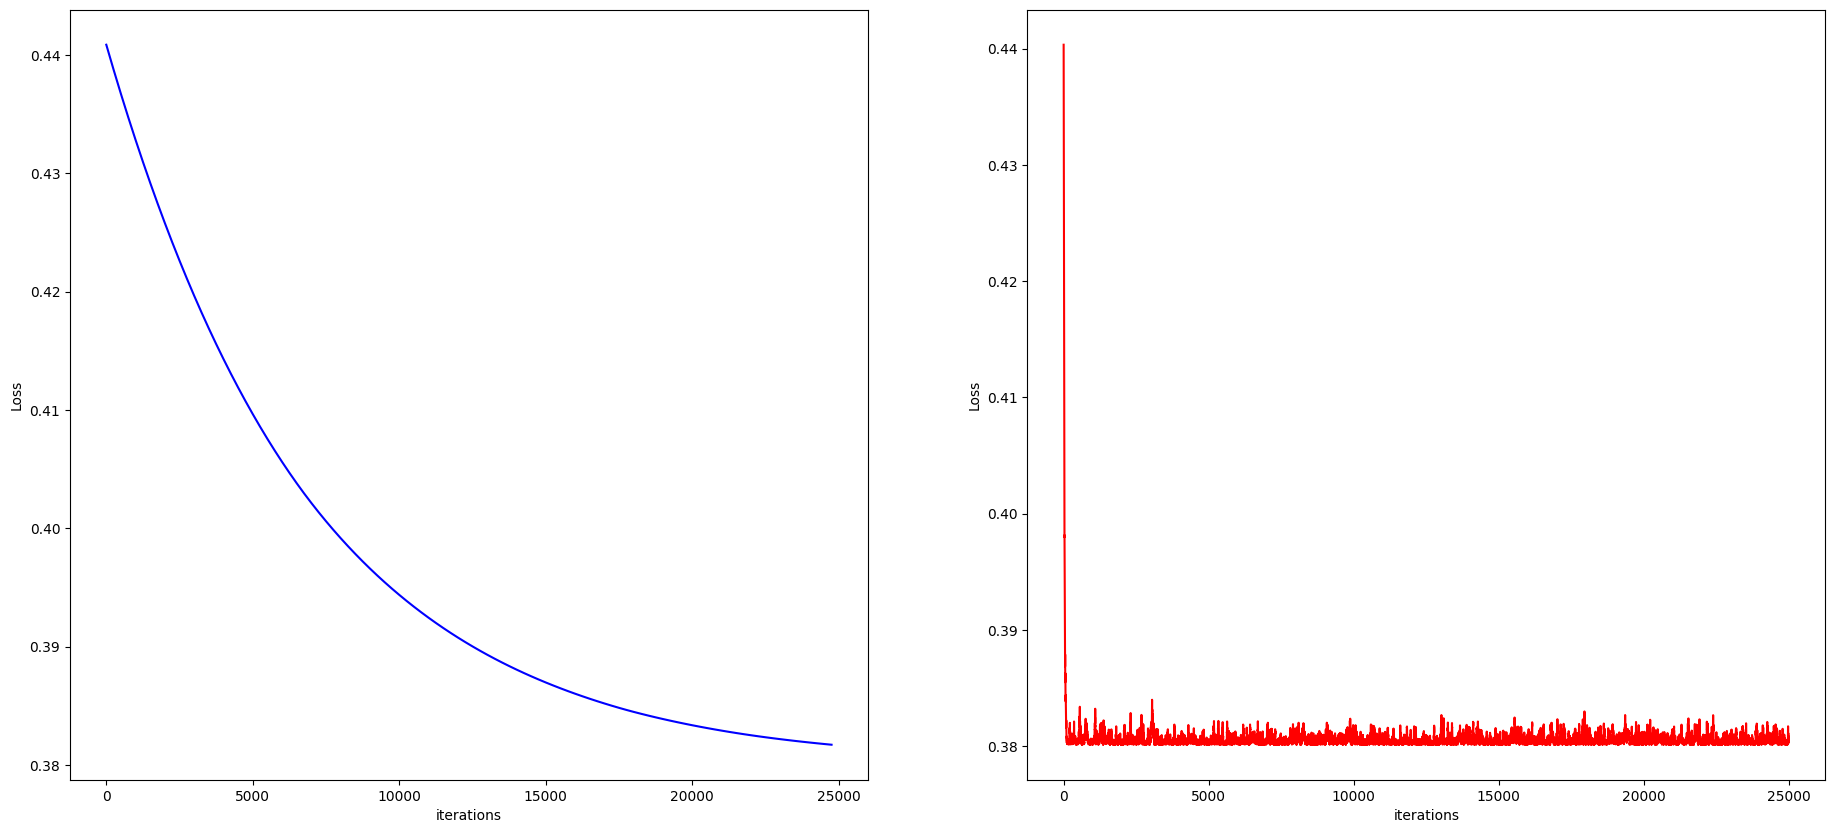

In [4]:
from matplotlib.pyplot import figure
fig = figure(figsize=(35,10))
losses_gd_plot = fig.add_subplot(1,3,1)
losses_gd_plot.plot([i*NUM_BATCHES for i in range(len(losses_gd))],losses_gd, "b")
losses_gd_plot.set_xlabel("iterations")
losses_gd_plot.set_ylabel("Loss")
# losses_gd_plot.set_xlim(2300,2500)

losses_sgd_plot = fig.add_subplot(1,3,2)
losses_sgd_plot.plot(losses_sgd, "r")
losses_sgd_plot.set_xlabel("iterations")
losses_sgd_plot.set_ylabel("Loss")
# losses_sgd_plot.set_xlim(2300,2500)


Text(0, 0.5, 'Loss')

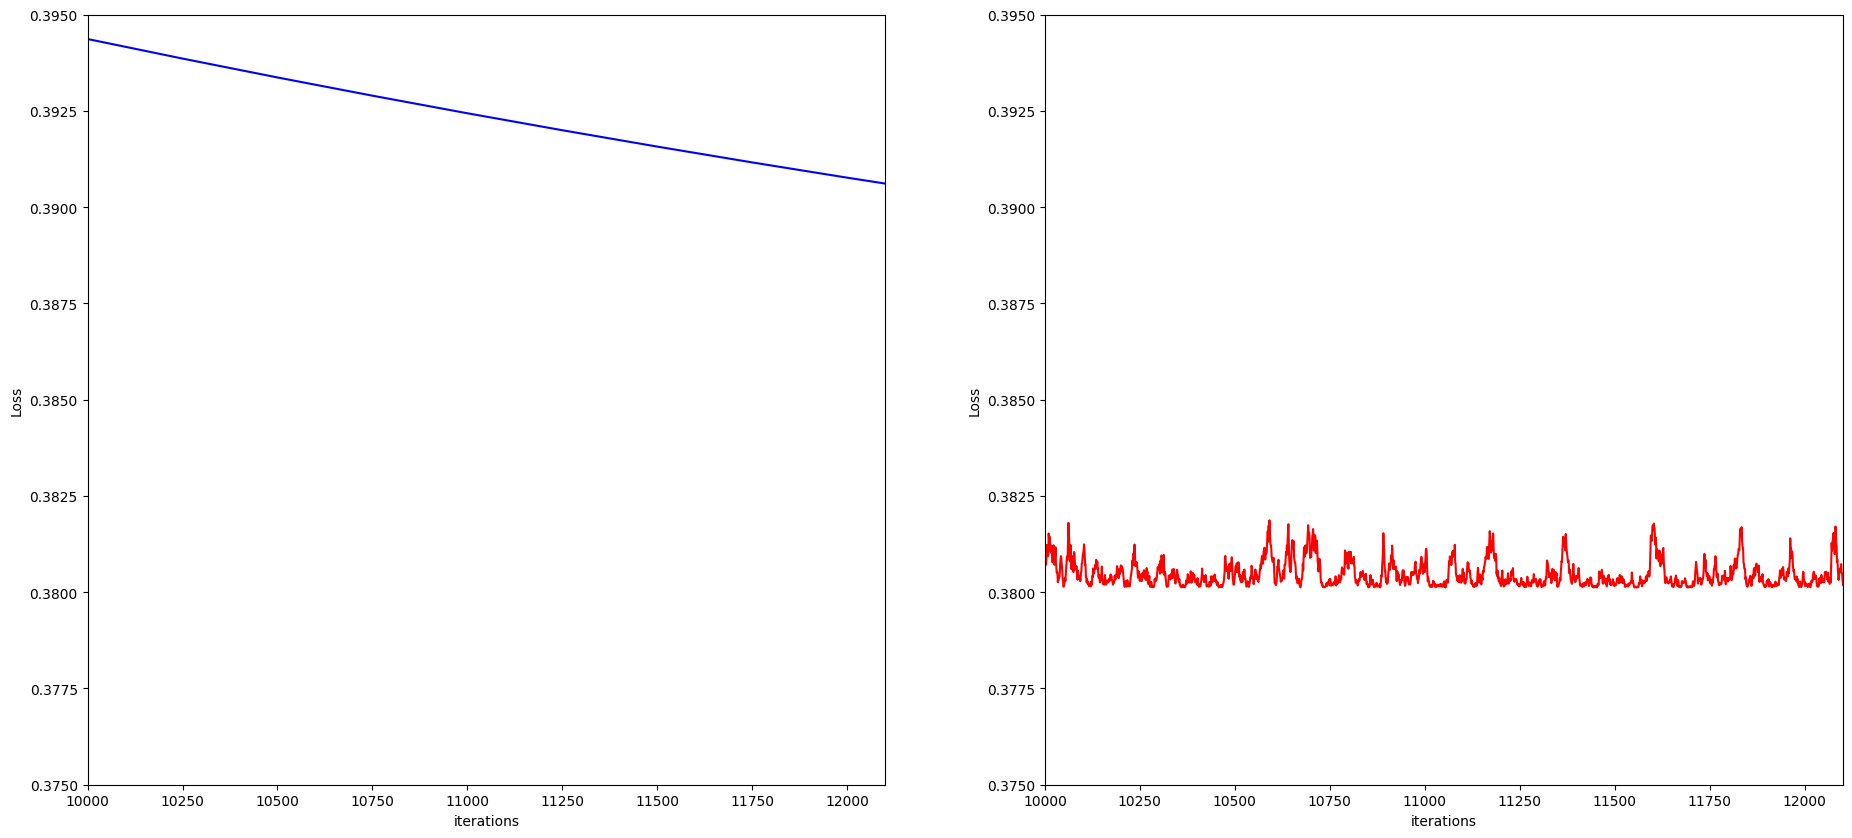

In [5]:
fig2 = figure(figsize=(35,10))
losses_gd_plot = fig2.add_subplot(1,3,1)
losses_gd_plot.plot([i*NUM_BATCHES for i in range(len(losses_gd))],losses_gd, "b")
losses_gd_plot.set_xlim(10000,12100)
losses_gd_plot.set_ylim(0.375,0.395)
losses_gd_plot.set_xlabel("iterations")
losses_gd_plot.set_ylabel("Loss")


losses_sgd_plot = fig2.add_subplot(1,3,2)
losses_sgd_plot.plot(losses_sgd, "r")
losses_sgd_plot.set_xlim(10000,12100)
losses_sgd_plot.set_ylim(0.375,0.395)
losses_sgd_plot.set_xlabel("iterations")
losses_sgd_plot.set_ylabel("Loss")


### A noise estimator of the gradient from SGD 

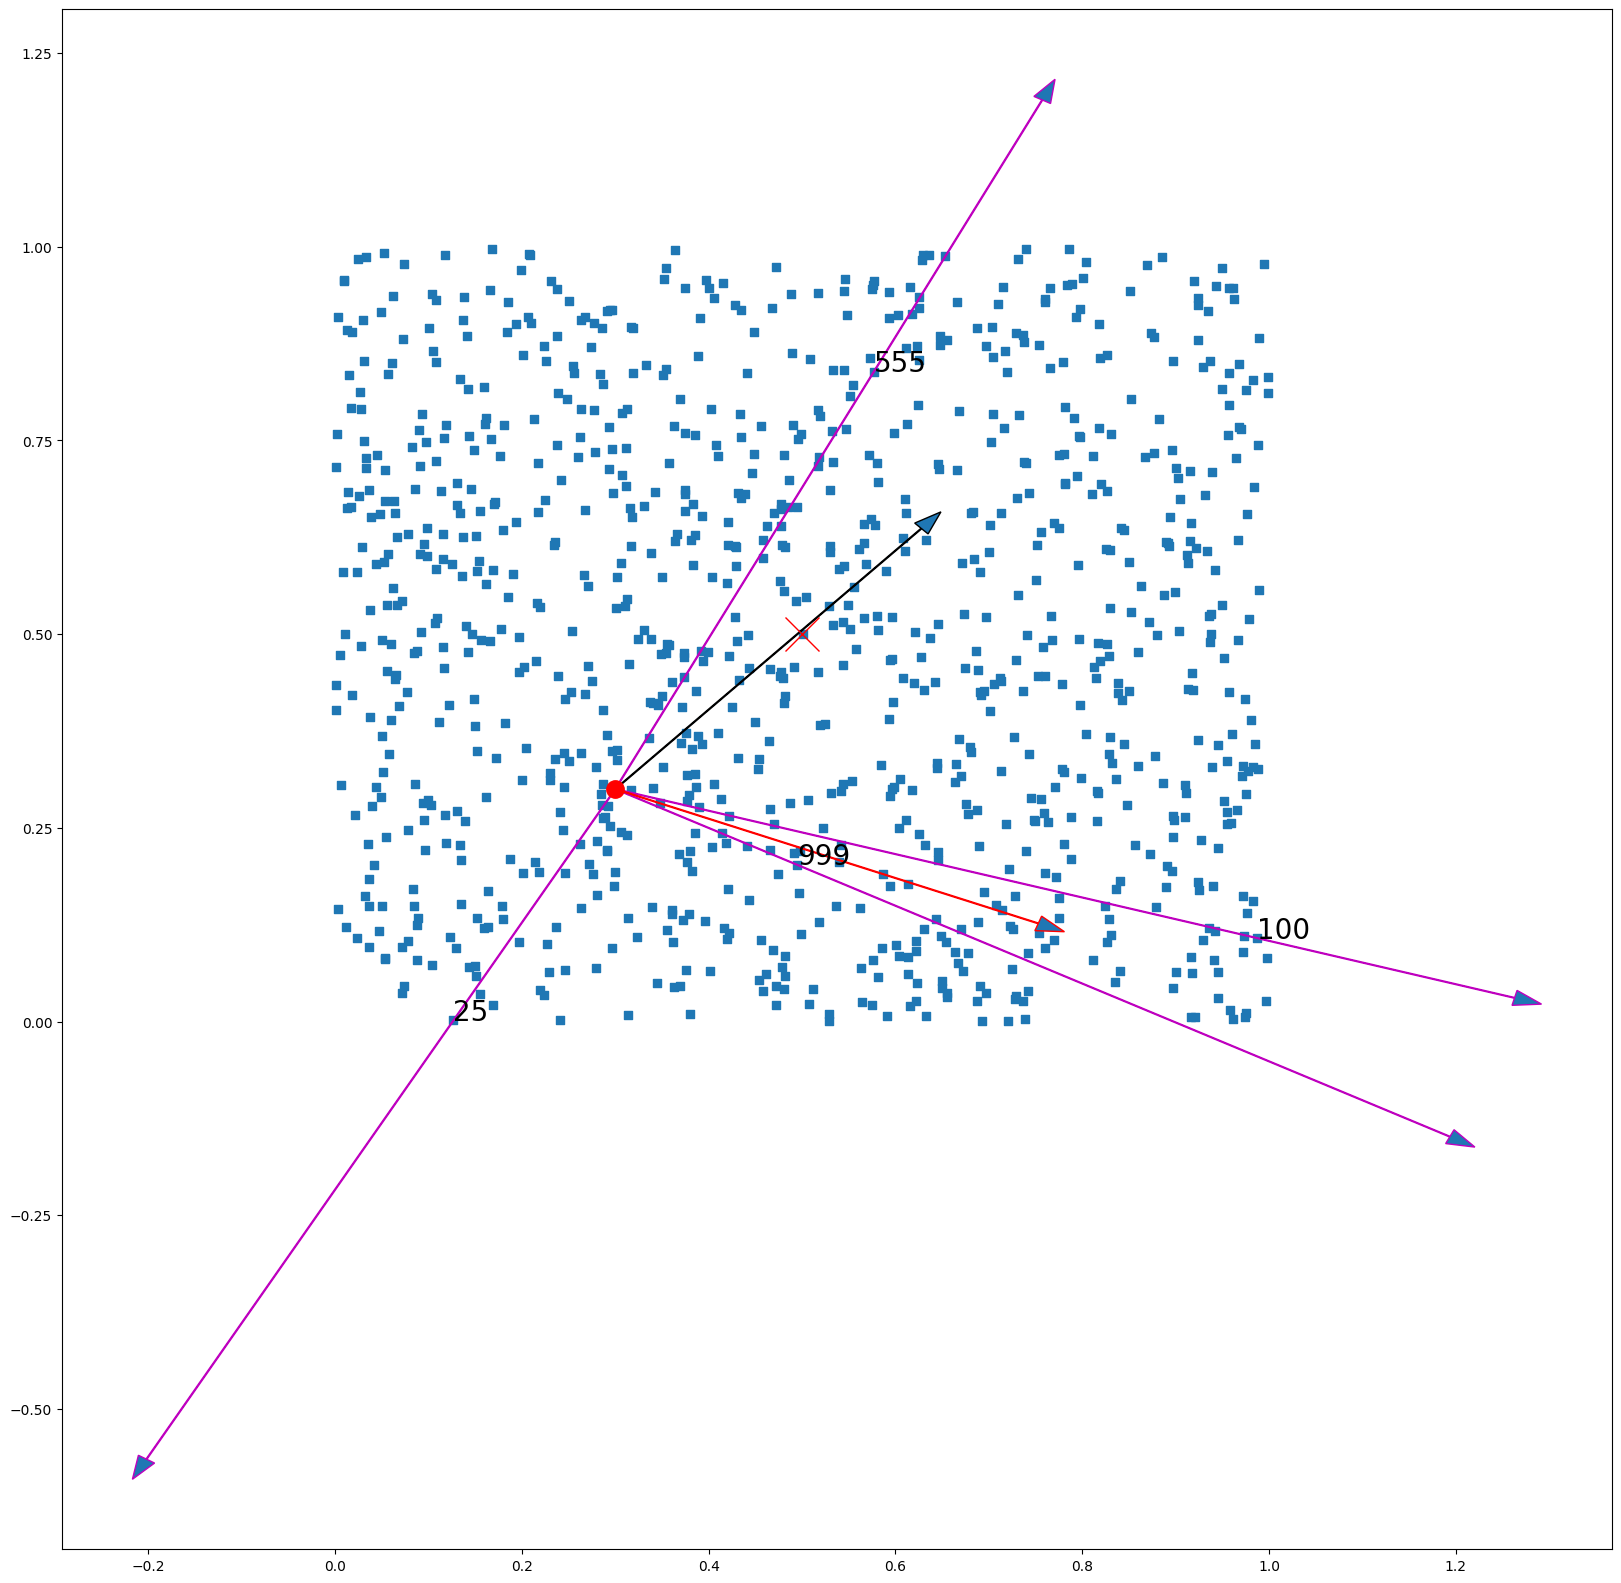

In [6]:
fig3 = figure(figsize=(20,20))
ax = fig3.add_subplot(1,1,1)
ax.scatter(list_x, list_y, marker=",")
# The random point is (0.3,0.3), shown as a big red dot
ax.plot(0.3,0.3,"r.", markersize = 25)
# A point near to the solution (0.49,0.49), shown as a big red cross
ax.plot(0.5, 0.5, "rx", markersize = 25)
x_p, y_p = 0.3, 0.3
grad_x, grad_y = calc_grad_closed_form(batch_x= list_x,batch_y = list_y, x_p=x_p, y_p=y_p)
ax.arrow(x_p, y_p, -grad_x, -grad_y, head_width = 0.02) # A black arrow, starting from the random point, and pointing towards its gradient accross all the data, not a batch of it
# Surprisingly, or honestly not :), it's pointing towards the optimal point / the solution

batch_indecis= [100, 555, 999, 25]

# drawing multiple arrows, each magenta (purple) arrow shows the contribution of one single point
# the red arrow show the collective contribution of the 4 points, we can notice that it's just the resultant of the 4 single contributions
for i in batch_indecis:
    ax.text(list_x[i], list_y[i],str(i), fontsize = 20 )
    grad_x_pnt, grad_y_pnt = calc_grad_closed_form([list_x[i]],[ list_y[i]], 0.3, 0.3)
    ax.arrow(0.3, 0.3, -grad_x_pnt,- grad_y_pnt, head_width = 0.02, edgecolor = "m")
    
grad_x_batch, grad_y_batch = calc_grad_closed_form([list_x[i] for i in batch_indecis], [list_y[i] for i in batch_indecis],0.3,0.3)
ax.arrow(x_p, y_p, -grad_x_batch, -grad_y_batch,
         head_width = 0.02, edgecolor = "r")